In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cal_mse(y_pred,y):
    return np.mean((y_pred-y)**2)

In [1]:
class LinearRegression:
    def __init__(self,lr=1e+3,iter=10) -> None:
        self.lr = lr
        self.iter = iter
        self.weights = None
        self.bias = None
        self.costs = []

    def cost(self, X,y,  theta):
        h = np.dot(X, theta)
        J = (1/2*len(y))*np.sum((h-y)**2)
        return J


    def fit(self,X, y):
        n_points,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iter):
            y_hat  = np.dot(X, self.weights) + self.bias # yhat
            dw = (1/n_points) *np.dot(X.T, (y-y_hat))
            db = (1/n_points)*np.sum(y-y_hat)

            # weights
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            self.costs.append(self.cost(X, y))
        
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

            

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X , y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=100)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=0)

regressor = LinearRegression(lr=0.001)

In [3]:
regressor.fit(X_train,y_train) # model fit
preds = regressor.predict(X_test)  # making predictions on test set

NameError: name 'np' is not defined

In [6]:
cal_mse(preds, y_test)

2302.6873283742443

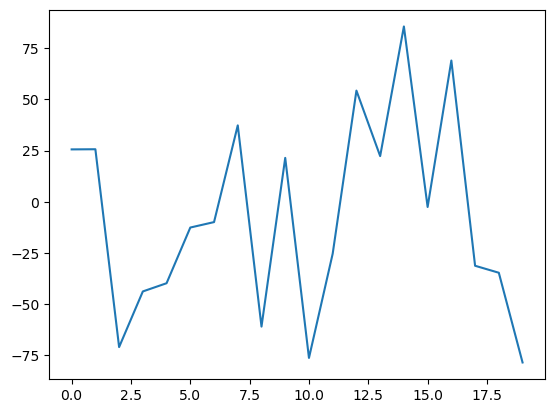

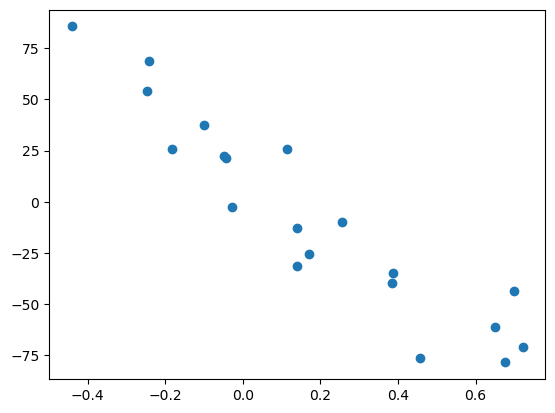

In [11]:
plt.plot(y_test-preds) # residuals
plt.show()
plt.scatter(preds,y_test-preds) # residual plot
plt.show()
